In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [47]:
df = pd.read_csv(r"C:\Users\spark tech\Downloads\archive (9)\lightening strikes dataset.csv")

In [48]:
df.head(2)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)


In [5]:
df.shape

(3401012, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [49]:
df["date"] = pd.to_datetime(df["date"])

In [50]:
df["Year"] = df["date"].dt.strftime("%Y")
df["Quater"] =  df["date"].dt.to_period("Q").dt.strftime("%Y-Q%q")
df["Month"] = df["date"].dt.month_name().str.slice(stop= 3)
df["Week"] = df["date"].dt.strftime("%Y-W%V")

In [9]:
df.head(3)

,date,number_of_strikes,center_point_geom,Year,Quater,Month,Week
0,2018-01-03,194,POINT(-75 27),2018,2018-Q1,Jan,2018-W01
1,2018-01-03,41,POINT(-78.4 29),2018,2018-Q1,Jan,2018-W01
2,2018-01-03,33,POINT(-73.9 27),2018,2018-Q1,Jan,2018-W01


In [51]:
df["Month"].value_counts()

Month
Aug    717530
Jul    711697
Jun    489215
May    419939
Sep    381114
Oct    169846
Apr    153786
Mar    104206
Nov     72604
Feb     66808
Jan     58410
Dec     55857
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
 3   Year               object        
 4   Quater             object        
 5   Month              object        
 6   Week               object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 181.6+ MB


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
 3   Year               object        
 4   Quater             object        
 5   Month              object        
 6   Week               object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 181.6+ MB


In [52]:
y = df.groupby(["Month"]).sum(numeric_only=True).sort_values("number_of_strikes", ascending=False)

In [53]:
y

,number_of_strikes
Month,
Aug,15525255
Jul,8320400
Jun,6445083
May,4166726
Sep,3018336
Feb,2071315
Apr,1524339
Oct,1093962
Jan,860045


In [54]:
month_frequency = df["Month"].value_counts()

In [55]:
month_frequency

Month
Aug    717530
Jul    711697
Jun    489215
May    419939
Sep    381114
Oct    169846
Apr    153786
Mar    104206
Nov     72604
Feb     66808
Jan     58410
Dec     55857
Name: count, dtype: int64

In [78]:
month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Aug","Nov","Dec"]

In [81]:
df.head()

,date,number_of_strikes,center_point_geom,Year,Quater,Month,Week
0,2018-01-03,194,POINT(-75 27),2018,2018-Q1,Jan,2018-W01
1,2018-01-03,41,POINT(-78.4 29),2018,2018-Q1,Jan,2018-W01
2,2018-01-03,33,POINT(-73.9 27),2018,2018-Q1,Jan,2018-W01
3,2018-01-03,38,POINT(-73.8 27),2018,2018-Q1,Jan,2018-W01
4,2018-01-03,92,POINT(-79 28),2018,2018-Q1,Jan,2018-W01


In [80]:
month_frequency

Month
jan         NaN
Feb     66808.0
Mar    104206.0
Apr    153786.0
May    419939.0
Jun    489215.0
Jul    711697.0
Aug    717530.0
Sep    381114.0
Aug    717530.0
Nov     72604.0
Dec     55857.0
Name: count, dtype: float64

In [59]:
y = y.reindex(index =month_order)

In [60]:
y

,number_of_strikes
Month,
jan,NaN
Feb,2071315.0
Mar,854168.0
Apr,1524339.0
May,4166726.0
Jun,6445083.0
Jul,8320400.0
Aug,15525255.0
Sep,3018336.0


In [61]:
df.groupby("Month").sum(numeric_only = True)

,number_of_strikes
Month,
Apr,1524339
Aug,15525255
Dec,312097
Feb,2071315
Jan,860045
Jul,8320400
Jun,6445083
Mar,854168
May,4166726


In [70]:
r = df.groupby(df["Month"]).sum(numeric_only = True)

In [65]:
def readable_number(x):
    if x<1000:
        return x
    elif x<1e6:
        return "{:1.0f}K".format(x*1e-3)
    else:
        return "{:1.1f}M".format(x*1e-6)


In [74]:
t =r.applymap(readable_number)

C:\Users\spark tech\AppData\Local\Temp\ipykernel_7788\317705117.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  t =r.applymap(readable_number)


In [75]:
t

,number_of_strikes
Month,
Apr,1.5M
Aug,15.5M
Dec,312K
Feb,2.1M
Jan,860K
Jul,8.3M
Jun,6.4M
Mar,854K
May,4.2M


In [76]:
y =y.applymap(readable_number)

C:\Users\spark tech\AppData\Local\Temp\ipykernel_7788\2257434741.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y =y.applymap(readable_number)


In [77]:
y

,number_of_strikes
Month,
jan,nanM
Feb,2.1M
Mar,854K
Apr,1.5M
May,4.2M
Jun,6.4M
Jul,8.3M
Aug,15.5M
Sep,3.0M


In [82]:
df.head(2)

,date,number_of_strikes,center_point_geom,Year,Quater,Month,Week
0,2018-01-03,194,POINT(-75 27),2018,2018-Q1,Jan,2018-W01
1,2018-01-03,41,POINT(-78.4 29),2018,2018-Q1,Jan,2018-W01


In [85]:
df.groupby("Year").sum(numeric_only = True)

,number_of_strikes
Year,
2018,44600989


<Axes: xlabel='number_of_strikes'>

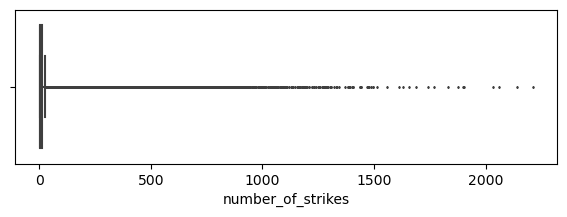

In [88]:
plt.figure(figsize = (7,2))
sns.boxplot(x=df["number_of_strikes"], fliersize =1)


In [89]:
Strikes_above1500 df[df["number_of_strikes"] >1500]

,date,number_of_strikes,center_point_geom,Year,Quater,Month,Week
2462,2018-01-11,1611,POINT(-76 24.1),2018,2018-Q1,Jan,2018-W02
11517,2018-02-10,1899,POINT(-95.5 28.1),2018,2018-Q1,Feb,2018-W06
12002,2018-02-11,1513,POINT(-88.6 29.1),2018,2018-Q1,Feb,2018-W06
12688,2018-02-11,1686,POINT(-88.7 29),2018,2018-Q1,Feb,2018-W06
19811,2018-02-22,1559,POINT(-96.6 32.7),2018,2018-Q1,Feb,2018-W08
24825,2018-02-25,1741,POINT(-98 29),2018,2018-Q1,Feb,2018-W08
24906,2018-02-25,1833,POINT(-98.7 28.9),2018,2018-Q1,Feb,2018-W08
24907,2018-02-25,1655,POINT(-98.6 28.9),2018,2018-Q1,Feb,2018-W08
277506,2018-08-16,1878,POINT(-89.7 31.5),2018,2018-Q3,Aug,2018-W33
278382,2018-08-16,1902,POINT(-96.2 36.1),2018,2018-Q3,Aug,2018-W33


In [90]:
df.head(3)

,date,number_of_strikes,center_point_geom,Year,Quater,Month,Week
0,2018-01-03,194,POINT(-75 27),2018,2018-Q1,Jan,2018-W01
1,2018-01-03,41,POINT(-78.4 29),2018,2018-Q1,Jan,2018-W01
2,2018-01-03,33,POINT(-73.9 27),2018,2018-Q1,Jan,2018-W01


C:\Users\spark tech\AppData\Local\Temp\ipykernel_7788\392291269.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["number_of_strikes"])
C:\Users\spark tech\anaconda3\anaconda new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


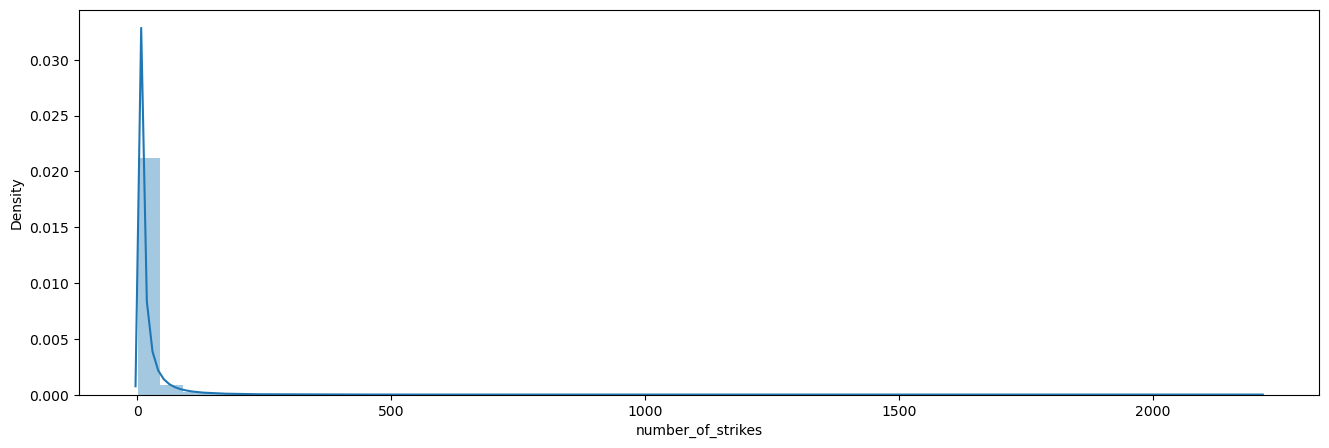

In [94]:
plt.figure(figsize = (16,5))
sns.distplot(df["number_of_strikes"])
plt.show()

In [95]:
df["number_of_strikes"].mean()

13.114034587352235

In [96]:
df["number_of_strikes"].median()

4.0

In [97]:
df["number_of_strikes"].mode()

0    1
Name: number_of_strikes, dtype: int64

In [98]:
df["number_of_strikes"].std()

32.12099150163301

<Axes: >

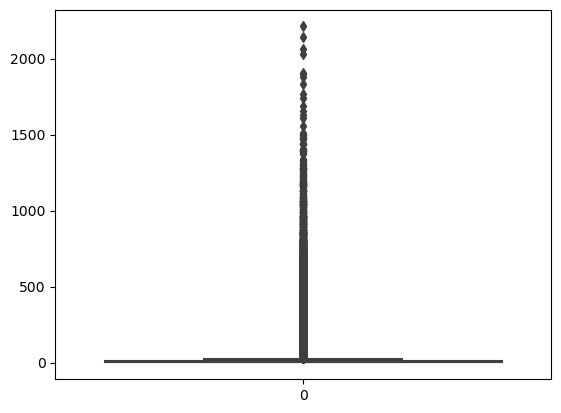

In [99]:
sns.boxplot(df["number_of_strikes"])

In [100]:
print("Upper_Bound",df["number_of_strikes"].mean() + 3*df["number_of_strikes"].std())
print("Lower_Bound",df["number_of_strikes"].mean() - 3*df["number_of_strikes"].std())

Upper_Bound 109.47700909225127
Lower_Bound -83.24893991754679


In [118]:
outliers= df[(df["number_of_strikes"]> 109) | (df["number_of_strikes"]<-83.2)].head()

In [119]:
outliers

,date,number_of_strikes,center_point_geom,Year,Quater,Month,Week
0,2018-01-03,194,POINT(-75 27),2018,2018-Q1,Jan,2018-W01
5,2018-01-03,119,POINT(-78 28),2018,2018-Q1,Jan,2018-W01
9,2018-01-03,119,POINT(-78.6 28),2018,2018-Q1,Jan,2018-W01
11,2018-01-03,158,POINT(-78.4 28),2018,2018-Q1,Jan,2018-W01
12,2018-01-03,168,POINT(-78.3 28),2018,2018-Q1,Jan,2018-W01


In [104]:
outliers

,date,number_of_strikes,center_point_geom,Year,Quater,Month,Week
0,2018-01-03,194,POINT(-75 27),2018,2018-Q1,Jan,2018-W01
5,2018-01-03,119,POINT(-78 28),2018,2018-Q1,Jan,2018-W01
9,2018-01-03,119,POINT(-78.6 28),2018,2018-Q1,Jan,2018-W01
11,2018-01-03,158,POINT(-78.4 28),2018,2018-Q1,Jan,2018-W01
12,2018-01-03,168,POINT(-78.3 28),2018,2018-Q1,Jan,2018-W01


In [120]:
df["number_of_strikes"].min()

1

In [109]:
df["number_of_strikes"].values

array([194,  41,  33, ...,  30,  30,  30], dtype=int64)

In [110]:
df.shape

(3401012, 7)

In [112]:
df[df["number_of_strikes"]> 109].shape

(55702, 7)

In [122]:
df["number_of_strikes"].describe()

count    3.401012e+06
mean     1.311403e+01
std      3.212099e+01
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      1.200000e+01
max      2.211000e+03
Name: number_of_strikes, dtype: float64

In [123]:
df[df["number_of_strikes"]>109]

,date,number_of_strikes,center_point_geom,Year,Quater,Month,Week
0,2018-01-03,194,POINT(-75 27),2018,2018-Q1,Jan,2018-W01
5,2018-01-03,119,POINT(-78 28),2018,2018-Q1,Jan,2018-W01
9,2018-01-03,119,POINT(-78.6 28),2018,2018-Q1,Jan,2018-W01
11,2018-01-03,158,POINT(-78.4 28),2018,2018-Q1,Jan,2018-W01
12,2018-01-03,168,POINT(-78.3 28),2018,2018-Q1,Jan,2018-W01
...,...,...,...,...,...,...,...
404515,2018-12-27,157,POINT(-93 30.1),2018,2018-Q4,Dec,2018-W52
404521,2018-12-27,150,POINT(-92.9 30.1),2018,2018-Q4,Dec,2018-W52
404522,2018-12-27,115,POINT(-92.8 30.1),2018,2018-Q4,Dec,2018-W52
404526,2018-12-27,118,POINT(-93.2 29.9),2018,2018-Q4,Dec,2018-W52


In [124]:
with_out_outlier = df[(df["number_of_strikes"]< 109) & (df["number_of_strikes"]>-83.2)]

In [126]:
with_out_outlier.shape

(3344699, 7)

In [127]:
df.shape

(3401012, 7)

In [128]:
3401012-3344699

56313

In [132]:
with_out_outlier.head()

,date,number_of_strikes,center_point_geom,Year,Quater,Month,Week
1,2018-01-03,41,POINT(-78.4 29),2018,2018-Q1,Jan,2018-W01
2,2018-01-03,33,POINT(-73.9 27),2018,2018-Q1,Jan,2018-W01
3,2018-01-03,38,POINT(-73.8 27),2018,2018-Q1,Jan,2018-W01
4,2018-01-03,92,POINT(-79 28),2018,2018-Q1,Jan,2018-W01
6,2018-01-03,35,POINT(-79.3 28),2018,2018-Q1,Jan,2018-W01


In [133]:
with_out_outlier.shape

(3344699, 7)

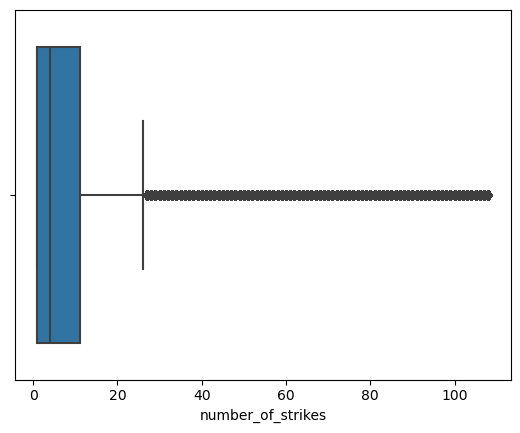

In [135]:
sns.boxplot(data=with_out_outlier, x="number_of_strikes")
plt.show()

In [136]:


# Assuming `df["column"]` contains the right-skewed data
Q1 = df["number_of_strikes"].quantile(0.25)
Q3 = df["number_of_strikes"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["number_of_strikes"] < lower_bound) | (df["number_of_strikes"] > upper_bound)]

print("Outliers:")
print(outliers)


Outliers:
              date  number_of_strikes  center_point_geom  Year   Quater Month  \
0       2018-01-03                194      POINT(-75 27)  2018  2018-Q1   Jan   
1       2018-01-03                 41    POINT(-78.4 29)  2018  2018-Q1   Jan   
2       2018-01-03                 33    POINT(-73.9 27)  2018  2018-Q1   Jan   
3       2018-01-03                 38    POINT(-73.8 27)  2018  2018-Q1   Jan   
4       2018-01-03                 92      POINT(-79 28)  2018  2018-Q1   Jan   
...            ...                ...                ...   ...      ...   ...   
3401007 2018-12-28                 30  POINT(-90.6 28.7)  2018  2018-Q4   Dec   
3401008 2018-12-28                 30  POINT(-89.4 30.9)  2018  2018-Q4   Dec   
3401009 2018-12-28                 30  POINT(-89.5 31.4)  2018  2018-Q4   Dec   
3401010 2018-12-28                 30  POINT(-88.3 31.6)  2018  2018-Q4   Dec   
3401011 2018-12-28                 30  POINT(-88.4 32.1)  2018  2018-Q4   Dec   

             Week

In [137]:
outliers.shape

(380501, 7)

In [138]:
lower_bound

-13.0

In [139]:
upper_bound

27.0

In [140]:
t = df[(df["number_of_strikes"] > lower_bound) & (df["number_of_strikes"] < upper_bound)]

In [141]:
t.shape

(2998900, 7)

<Axes: xlabel='number_of_strikes'>

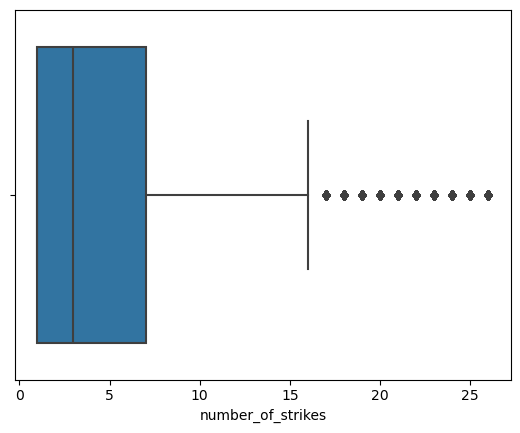

In [142]:
sns.boxplot(data = t, x= "number_of_strikes")

C:\Users\spark tech\AppData\Local\Temp\ipykernel_7788\722424247.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t["number_of_strikes"])
C:\Users\spark tech\anaconda3\anaconda new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='number_of_strikes', ylabel='Density'>

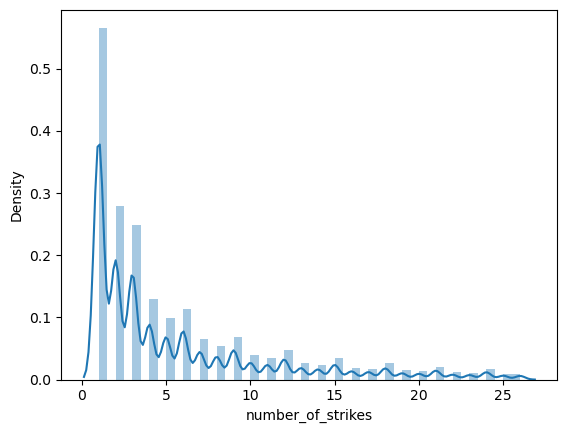

In [145]:
sns.distplot(t["number_of_strikes"])

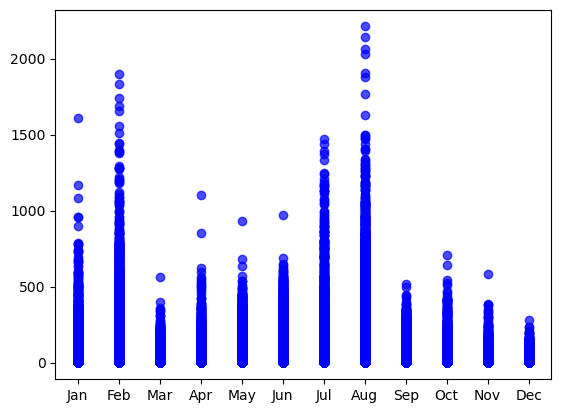

In [146]:
plt.scatter(df["Month"], df["number_of_strikes"], alpha=0.7, color="blue")

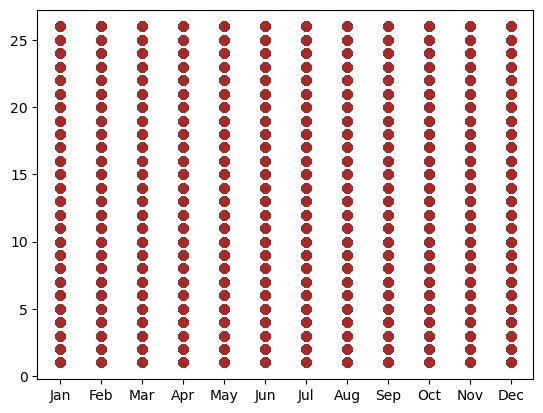

In [150]:
plt.scatter(t["Month"], t["number_of_strikes"],alpha=1, color="Brown")

In [151]:
outliers

,date,number_of_strikes,center_point_geom,Year,Quater,Month,Week
0,2018-01-03,194,POINT(-75 27),2018,2018-Q1,Jan,2018-W01
1,2018-01-03,41,POINT(-78.4 29),2018,2018-Q1,Jan,2018-W01
2,2018-01-03,33,POINT(-73.9 27),2018,2018-Q1,Jan,2018-W01
3,2018-01-03,38,POINT(-73.8 27),2018,2018-Q1,Jan,2018-W01
4,2018-01-03,92,POINT(-79 28),2018,2018-Q1,Jan,2018-W01
...,...,...,...,...,...,...,...
3401007,2018-12-28,30,POINT(-90.6 28.7),2018,2018-Q4,Dec,2018-W52
3401008,2018-12-28,30,POINT(-89.4 30.9),2018,2018-Q4,Dec,2018-W52
3401009,2018-12-28,30,POINT(-89.5 31.4),2018,2018-Q4,Dec,2018-W52
3401010,2018-12-28,30,POINT(-88.3 31.6),2018,2018-Q4,Dec,2018-W52


In [152]:
outliers.to_csv("output.csv", index=False)  # index=False prevents saving the index as a column
print("CSV file saved successfully.")

CSV file saved successfully.


In [154]:
outliers.to_excel("output.xlsx", index=False)  # index=False prevents saving the index as a column
print("Excel file saved successfully.")

Excel file saved successfully.


In [155]:
outliers.to_csv("output1.csv", sep=";", index=False)